# Data Preparation

    Tasks
    1.Data selection
    2.Data preprocessing
    3.Feature engineering
    4.Dimensionality reduction

    Steps:
    Data cleaning

    Data integration

    Data sampling

    Data dimensionality reduction

    Data formatting

    Data transformation

    Scaling

    Aggregation

    Decomposition


# Chronological Order and Equidistant Timestamps

The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data (see Resampling).

This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step.



    
    
    

In [58]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, date 
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
# Import Normalizer
from sklearn.preprocessing import Normalizer
import os
import plotly_express as px# Visualization
import plotly.graph_objects as go# Visualization
from plotly.subplots import make_subplots# Visualization
import gc
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [59]:
TrainData= '/home/abderrazak/ALLINHERE/NLP/Datacamp/sag_data_train.csv'
TestData= '/home/abderrazak/ALLINHERE/NLP/Datacamp/sag_data_test.csv'
#df = pd.read_csv(TrainData)
df1 = pd.read_csv(TrainData, parse_dates=['Time'])
#df = pd.read_csv(TrainData, index_col='Time', parse_dates=True)


# Downcasting


In [60]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [61]:
df=reduce_mem_usage(df1)

Memory usage of dataframe is 7.38 MB
Memory usage after optimization is: 6.59 MB
Decreased by 10.7%


# Data Preprocessing
# Date Time Features

### Chronological Order and Equidistant Timestamps

In [62]:

# Sort values by timestamp (not necessary in this case)
df = df.sort_values(by='Time')

# Check time intervals
df['Time_Interval'] = df.Time - df.Time.shift(1)

df[['Time', 'Time_Interval']].tail(20)

,Time,Time_Interval
138221,2015-12-19 23:41:00,0 days 00:01:00
138222,2015-12-19 23:42:00,0 days 00:01:00
138223,2015-12-19 23:43:00,0 days 00:01:00
138224,2015-12-19 23:44:00,0 days 00:01:00
138225,2015-12-19 23:45:00,0 days 00:01:00
138226,2015-12-19 23:46:00,0 days 00:01:00
138227,2015-12-19 23:47:00,0 days 00:01:00
138228,2015-12-19 23:48:00,0 days 00:01:00
138229,2015-12-19 23:49:00,0 days 00:01:00
138230,2015-12-19 23:50:00,0 days 00:01:00


In [65]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df['day_of_year'] = pd.DatetimeIndex(df['Time']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['Time']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['Time']).quarter
df['season'] = df.month%12 // 3 + 1

df[['Time', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,Time,year,month,day,day_of_year,week_of_year,quarter,season
0,2015-09-15 00:00:00,2015,9,15,258,38,3,4
1,2015-09-15 00:01:00,2015,9,15,258,38,3,4
2,2015-09-15 00:02:00,2015,9,15,258,38,3,4
3,2015-09-15 00:03:00,2015,9,15,258,38,3,4
4,2015-09-15 00:04:00,2015,9,15,258,38,3,4


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138241 entries, 0 to 138240
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   Time                           138241 non-null  datetime64[ns] 
 1   Bearing Pressure (kPa)         138240 non-null  float64        
 2   Power Draw (MW)                138240 non-null  float64        
 3   Speed (RPM)                    138241 non-null  float64        
 4   Dilution Flow Rate (m3/h)      138239 non-null  float64        
 5   Conveyor Belt Feed Rate (t/h)  138239 non-null  float64        
 6   Conveyor Belt PSD Fines (%)    138239 non-null  float16        
 7   Time_Interval                  138240 non-null  timedelta64[ns]
 8   year                           138241 non-null  int64          
 9   month                          138241 non-null  int64          
 10  day                            138241 non-null  int64   


# Handling Missing Values

We can see that we have some  missing values.

Furthermore, plotting the time series reveals that there seem to be some implausible zero values . We will have to clean them by replacing them by nan values and filling them afterwards.


In [9]:
df=df.drop_duplicates().dropna()
df.shape

(138237, 8)

In [10]:
np.sum(df['Speed (RPM)'] == 0)

1961

In [11]:
df.columns

Index(['Time', 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Time_Interval'],
      dtype='object')

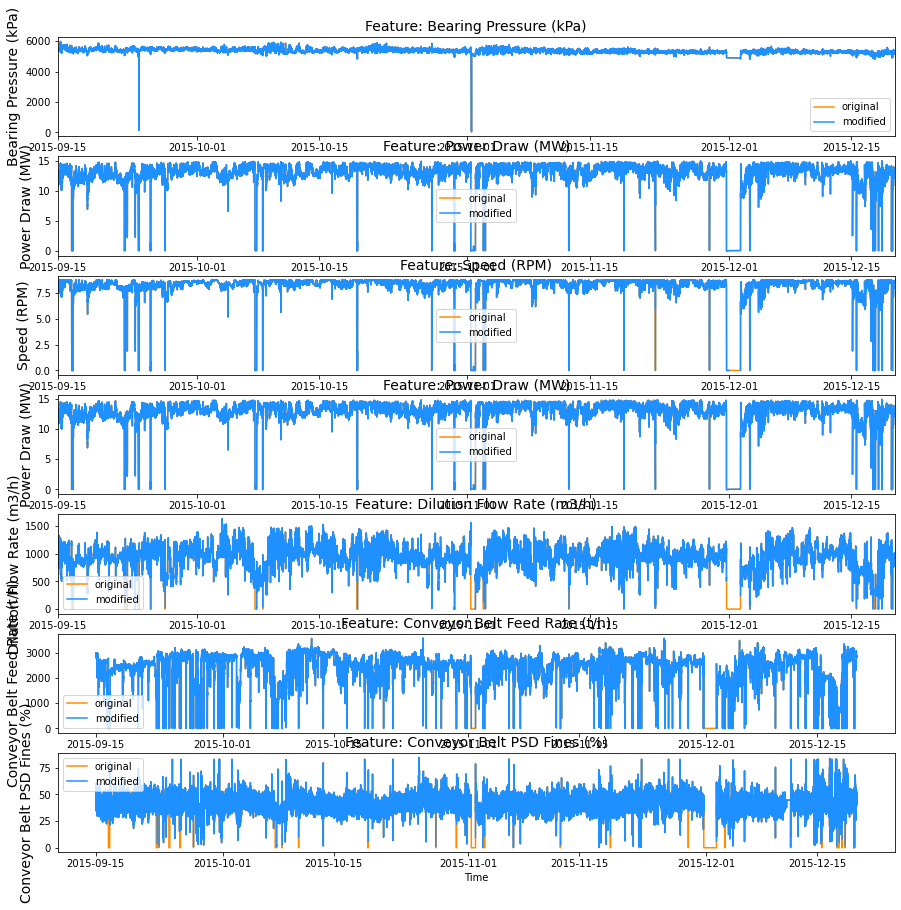

In [12]:
f, ax = plt.subplots(nrows=7, ncols=1, figsize=(15, 15))
old = df['Bearing Pressure (kPa)'].copy()
df['Bearing Pressure (kPa)'] = np.where((df['Bearing Pressure (kPa)'] == 0),np.nan, df['Bearing Pressure (kPa)'])

sns.lineplot(x=df.Time, y=old.fillna(np.inf), ax=ax[0], color='darkorange', label = 'original')
sns.lineplot(x=df.Time, y=df['Bearing Pressure (kPa)'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'modified')
ax[0].set_title('Feature: Bearing Pressure (kPa)', fontsize=14)
ax[0].set_ylabel(ylabel='Bearing Pressure (kPa)', fontsize=14)

old1 = df['Power Draw (MW)'].copy()
df['Power Draw (MW)']= np.where((df['Power Draw (MW)'] == 0),np.nan, df['Power Draw (MW)'])

sns.lineplot(x=df.Time, y=old1.fillna(np.inf), ax=ax[1], color='darkorange', label = 'original')
sns.lineplot(x=df.Time, y=df['Power Draw (MW)'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'modified')
ax[1].set_title('Feature: Power Draw (MW)', fontsize=14)
ax[1].set_ylabel(ylabel='Power Draw (MW)', fontsize=14)

old2 = df['Speed (RPM)'].copy()
df['Speed (RPM)']= np.where((df['Speed (RPM)'] == 0),np.nan, df['Speed (RPM)'])

sns.lineplot(x=df.Time, y=old2.fillna(np.inf), ax=ax[2], color='darkorange', label = 'original')
sns.lineplot(x=df.Time, y=df['Speed (RPM)'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'modified')
ax[2].set_title('Feature: Speed (RPM)', fontsize=14)
ax[2].set_ylabel(ylabel='Speed (RPM)', fontsize=14)

old3 = df['Power Draw (MW)'].copy()
df['Power Draw (MW)']= np.where((df['Power Draw (MW)'] == 0),np.nan, df['Power Draw (MW)'])

sns.lineplot(x=df.Time, y=old3.fillna(np.inf), ax=ax[3], color='darkorange', label = 'original')
sns.lineplot(x=df.Time, y=df['Power Draw (MW)'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'modified')
ax[3].set_title('Feature: Power Draw (MW)', fontsize=14)
ax[3].set_ylabel(ylabel='Power Draw (MW)', fontsize=14)



old4 = df['Dilution Flow Rate (m3/h)'].copy()
df['Dilution Flow Rate (m3/h)']= np.where((df['Dilution Flow Rate (m3/h)'] == 0),np.nan, df['Dilution Flow Rate (m3/h)'])

sns.lineplot(x=df.Time, y=old4.fillna(np.inf), ax=ax[4], color='darkorange', label = 'original')
sns.lineplot(x=df.Time, y=df['Dilution Flow Rate (m3/h)'].fillna(np.inf), ax=ax[4], color='dodgerblue', label = 'modified')
ax[4].set_title('Feature: Dilution Flow Rate (m3/h)', fontsize=14)
ax[4].set_ylabel(ylabel='Dilution Flow Rate (m3/h)', fontsize=14)

old5 = df['Conveyor Belt Feed Rate (t/h)'].copy()
df['Conveyor Belt Feed Rate (t/h)']= np.where((df['Conveyor Belt Feed Rate (t/h)'] == 0),np.nan, df['Conveyor Belt Feed Rate (t/h)'])
sns.lineplot(x=df.Time, y=old5.fillna(np.inf), ax=ax[5], color='darkorange', label = 'original')
sns.lineplot(x=df.Time, y=df['Conveyor Belt Feed Rate (t/h)'].fillna(np.inf), ax=ax[5], color='dodgerblue', label = 'modified')
ax[5].set_title('Feature: Conveyor Belt Feed Rate (t/h)', fontsize=14)
ax[5].set_ylabel(ylabel='Conveyor Belt Feed Rate (t/h)', fontsize=14)
             
old6 = df['Conveyor Belt PSD Fines (%)'].copy()
df['Conveyor Belt PSD Fines (%)']= np.where((df['Conveyor Belt PSD Fines (%)'] == 0),np.nan, df['Conveyor Belt PSD Fines (%)'])
sns.lineplot(x=df.Time, y=old6.fillna(np.inf), ax=ax[6], color='darkorange', label = 'original')
sns.lineplot(x=df.Time, y=df['Conveyor Belt PSD Fines (%)'].fillna(np.inf), ax=ax[6], color='dodgerblue', label = 'modified')
ax[6].set_title('Feature: Conveyor Belt PSD Fines (%)', fontsize=14)
ax[6].set_ylabel(ylabel='Conveyor Belt PSD Fines (%)', fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2015, 9, 15), date(2015, 12, 20)])

plt.show()

**Option 1: Fill NaN with Outlier or Zero**

In this specific example filling the missing value with an outlier value such as -999 is not a good idea.

**Option 2: Fill NaN with Mean Value**

 we can see that filling NaNs with the mean value is also not sufficient.

**Option 3: Fill NaN with Last Value with .ffill()**

Filling NaNs with the last value is already a little bit better in this case.

**Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()**

Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring values.

In [13]:
df['Bearing Pressure (kPa)'] = df['Bearing Pressure (kPa)'].interpolate()

df['Power Draw (MW)']= df['Power Draw (MW)'].interpolate()

df['Speed (RPM)']= df['Speed (RPM)'].interpolate()

df['Power Draw (MW)']=df['Power Draw (MW)'].interpolate()

df['Dilution Flow Rate (m3/h)']= df['Dilution Flow Rate (m3/h)'].interpolate()

df['Conveyor Belt Feed Rate (t/h)']=df['Conveyor Belt Feed Rate (t/h)'].interpolate()

df['Conveyor Belt PSD Fines (%)']=df['Conveyor Belt PSD Fines (%)'].interpolate()

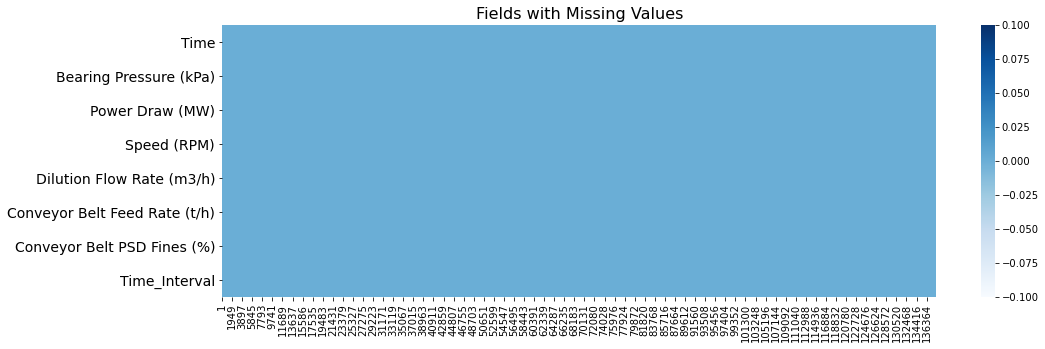

In [14]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

# Resampling
Resampling can provide additional information on the data. There are two types of resampling:

**Upsampling is when the frequency of samples is increased (e.g. days to hours)**

**Downsampling is when the frequency of samples is decreased (e.g. days to weeks)**

In this example, we will do some downsampling with the .resample() function.

In [22]:
df.columns

Index(['Time', 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Time_Interval'],
      dtype='object')

In [35]:
df.shape

(138241, 7)

In [90]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time') 

In [33]:
df_downsampled = df[['Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Time_Interval']].resample('5T').mean().reset_index(drop=False)

df_downsampled.shape

(27649, 7)

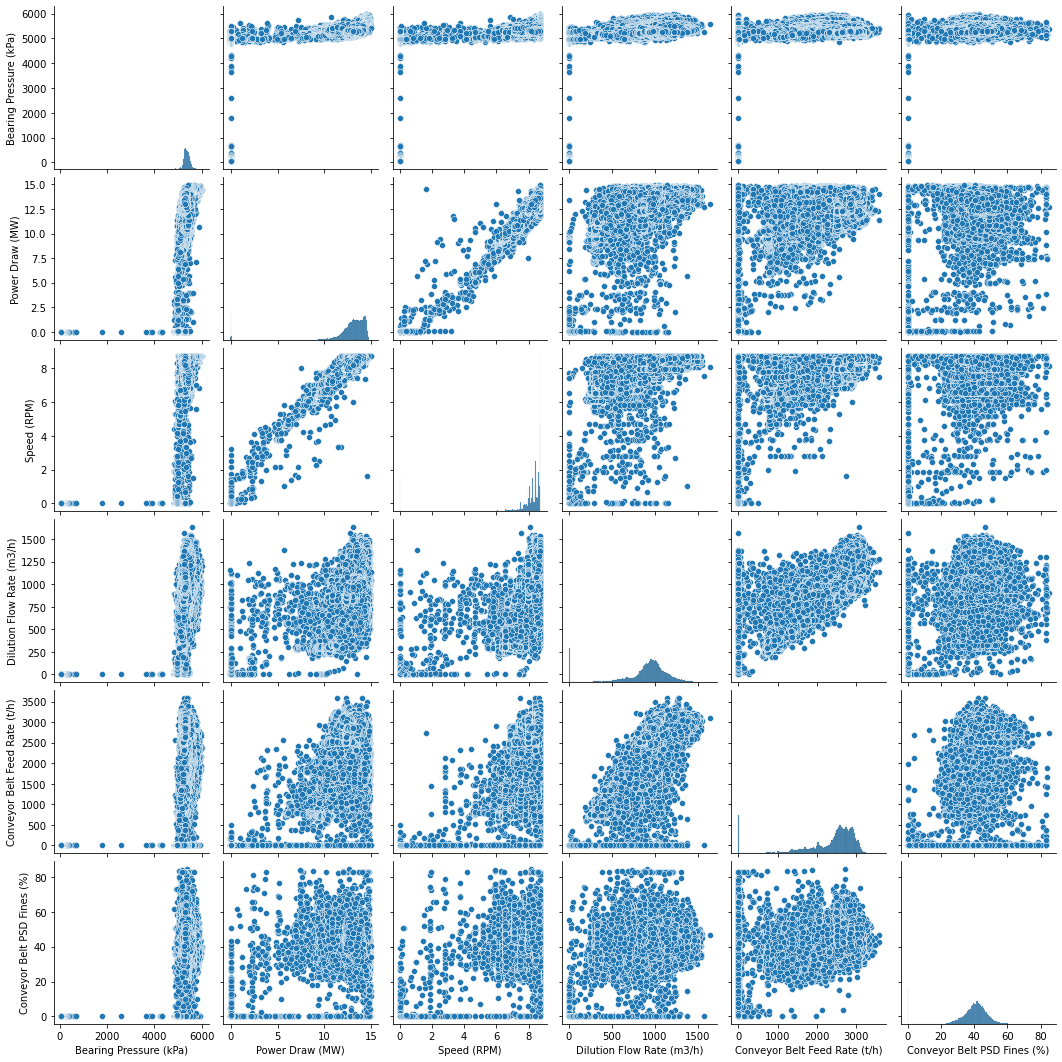

In [119]:
# Import packages
import matplotlib.pyplot as plt 
import seaborn as sns 

# Plot pairwise relationships
sns.pairplot(df[['Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Time_Interval']])

# Show plot
plt.show()

array([[<AxesSubplot:title={'center':'Bearing Pressure (kPa)'}>,
        <AxesSubplot:title={'center':'Power Draw (MW)'}>],
       [<AxesSubplot:title={'center':'Speed (RPM)'}>,
        <AxesSubplot:title={'center':'Dilution Flow Rate (m3/h)'}>],
       [<AxesSubplot:title={'center':'Conveyor Belt Feed Rate (t/h)'}>,
        <AxesSubplot:title={'center':'Conveyor Belt PSD Fines (%)'}>]],
      dtype=object)

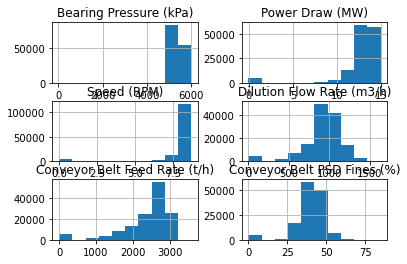

In [122]:
df[['Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Time_Interval']].hist()

# Feature Engineering
## Decomposition¶
The characteristics of a time series are

**Trend and Level**

**Seasonality**

**Random / Noise**

We can use the function seasonal_decompose() from the statsmodels library.

**Additive:  y(t)=Level+Trend+Seasonality+Noise**

**Multiplicative:  y(t)=Level∗Trend∗Seasonality∗Noise**

In [ ]:
df.columns

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  [ 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col].dropna(),freq=12, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

# Lag Features

In [ ]:
lag_cols =  [ 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)']

for col in decompose_cols:
    df[f"{col}_lag"] = df[col].shift(1)   

# Rolling Window Statistics

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends.
Hourly mean: 

we will use data for 20 min 

In [94]:
lag_cols =  [ 'Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)']

for col in decompose_cols:
    df[f"{col}_smooth"] = df[col].resample('20T').transform('mean')  

In [96]:
# Extract unsmoothed
unsmoothed =df['Power Draw (MW)']

# Apply a rolling mean with a 5 window: smoothed
smoothed = df['Power Draw (MW)_smooth'].rolling(window=12).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
DATA = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

DATA.describe()

,smoothed,unsmoothed
count,138230.000000,138240.000000
mean,12.647929,12.648002
std,2.621370,2.680285
min,-0.062704,-0.073347
25%,12.444650,12.442005
50%,13.233570,13.228316
75%,13.911288,13.943626
max,14.690148,14.965945


# Trends 

In [ ]:
df['daily_avg_sold'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id','d'])['sold'].transform('mean').astype(np.float16)
df['avg_sold'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform('mean').astype(np.float16)
df['selling_trend'] = (df['daily_avg_sold'] - df['avg_sold']).astype(np.float16)
df.drop(['daily_avg_sold','avg_sold'],axis=1,inplace=True)

In [97]:
df.columns

Index(['Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)', 'Time_Interval', 'year', 'month', 'day',
       'day_of_year', 'week_of_year', 'quarter', 'season',
       'Bearing Pressure (kPa)_trend', 'Bearing Pressure (kPa)_seasonal',
       'Power Draw (MW)_trend', 'Power Draw (MW)_seasonal',
       'Speed (RPM)_trend', 'Speed (RPM)_seasonal',
       'Dilution Flow Rate (m3/h)_trend', 'Dilution Flow Rate (m3/h)_seasonal',
       'Conveyor Belt Feed Rate (t/h)_trend',
       'Conveyor Belt Feed Rate (t/h)_seasonal',
       'Conveyor Belt PSD Fines (%)_trend',
       'Conveyor Belt PSD Fines (%)_seasonal', 'Bearing Pressure (kPa)_lag',
       'Power Draw (MW)_lag', 'Speed (RPM)_lag',
       'Dilution Flow Rate (m3/h)_lag', 'Conveyor Belt Feed Rate (t/h)_lag',
       'Conveyor Belt PSD Fines (%)_lag', 'Bearing Pressure (kPa)_smooth',
       'Power Draw (MW)_smooth', 'Speed (RP

In [98]:
df.describe()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%),Time_Interval,year,month,day,...,Speed (RPM)_lag,Dilution Flow Rate (m3/h)_lag,Conveyor Belt Feed Rate (t/h)_lag,Conveyor Belt PSD Fines (%)_lag,Bearing Pressure (kPa)_smooth,Power Draw (MW)_smooth,Speed (RPM)_smooth,Dilution Flow Rate (m3/h)_smooth,Conveyor Belt Feed Rate (t/h)_smooth,Conveyor Belt PSD Fines (%)_smooth
count,138240.000000,138240.000000,138241.000000,138239.000000,138239.000000,138239.00000,138240,138241.0,138241.000000,138241.000000,...,138240.000000,138238.000000,138238.000000,138238.00000,138241.000000,138241.000000,138241.000000,138241.000000,138241.000000,138241.00000
mean,5361.525046,12.648002,8.010549,914.572160,2397.461043,NaN,0 days 00:01:00,2015.0,10.541677,15.739614,...,8.010548,914.571751,2397.457688,NaN,5361.523885,12.647911,8.010549,914.572092,2397.460873,NaN
std,202.317899,2.680285,1.617348,253.075068,667.784116,0.00000,0 days 00:00:00,0.0,0.988659,8.538212,...,1.617353,253.075938,667.785366,0.00000,195.205486,2.636945,1.592771,245.125680,647.314701,0.00000
min,35.651295,-0.073347,0.000000,0.000000,0.000000,0.00000,0 days 00:01:00,2015.0,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,36.641638,-0.062704,0.000000,0.000000,0.000000,0.00000
25%,5288.404458,12.442005,8.057497,844.109738,2214.865825,36.43750,0 days 00:01:00,2015.0,10.000000,9.000000,...,8.057496,844.108719,2214.855420,36.43750,5291.743906,12.438883,8.071970,851.847665,2218.042691,37.59375
50%,5363.159059,13.228316,8.421999,954.845114,2595.094886,41.03125,0 days 00:01:00,2015.0,11.000000,16.000000,...,8.422000,954.844239,2595.093054,41.03125,5363.770055,13.231196,8.407095,958.148545,2588.043238,41.43750
75%,5450.906468,13.943626,8.677781,1052.036362,2816.975578,44.87500,0 days 00:01:00,2015.0,11.000000,23.000000,...,8.677796,1052.036383,2816.971166,44.87500,5449.516201,13.918687,8.645324,1046.927974,2804.241228,44.06250
max,5995.657529,14.965945,8.730035,1636.474899,3594.124010,84.75000,0 days 00:01:00,2015.0,12.000000,31.000000,...,8.730035,1636.474899,3594.124010,84.75000,5922.723650,14.690148,8.718392,1499.517907,3401.731022,65.50000


In [101]:
df[['Bearing Pressure (kPa)','Bearing Pressure (kPa)_smooth','Bearing Pressure (kPa)_lag','Bearing Pressure (kPa)_trend', 'Bearing Pressure (kPa)_seasonal',
      'Power Draw (MW)','Power Draw (MW)_smooth','Power Draw (MW)_lag' ,'Power Draw (MW)_trend', 'Power Draw (MW)_seasonal',
      'Speed (RPM)','Speed (RPM)_smooth','Speed (RPM)_lag','Speed (RPM)_trend', 'Speed (RPM)_seasonal',
       'Dilution Flow Rate (m3/h)','Dilution Flow Rate (m3/h)_smooth','Dilution Flow Rate (m3/h)_lag','Dilution Flow Rate (m3/h)_trend', 'Dilution Flow Rate (m3/h)_seasonal',
       'Conveyor Belt Feed Rate (t/h)','Conveyor Belt Feed Rate (t/h)_smooth','Conveyor Belt Feed Rate (t/h)_lag','Conveyor Belt Feed Rate (t/h)_trend','Conveyor Belt Feed Rate (t/h)_seasonal',
       'Conveyor Belt PSD Fines (%)','Conveyor Belt PSD Fines (%)_smooth', 'Conveyor Belt PSD Fines (%)_lag','Conveyor Belt PSD Fines (%)_trend','Conveyor Belt PSD Fines (%)_seasonal' ]].head(20)\
.style.set_properties(subset=['Bearing Pressure (kPa)_lag','Bearing Pressure (kPa)_trend', 'Bearing Pressure (kPa)_seasonal', 
                              'Power Draw (MW)_smooth','Power Draw (MW)_lag','Power Draw (MW)_trend', 'Power Draw (MW)_seasonal',
                             'Speed (RPM)_smooth','Speed (RPM)_lag' ,'Speed (RPM)_trend', 'Speed (RPM)_seasonal', 
                             'Dilution Flow Rate (m3/h)_smooth','Dilution Flow Rate (m3/h)_lag', 'Dilution Flow Rate (m3/h)_trend', 'Dilution Flow Rate (m3/h)_seasonal',
                           'Conveyor Belt Feed Rate (t/h)_smooth' ,'Conveyor Belt Feed Rate (t/h)_lag' , 'Conveyor Belt Feed Rate (t/h)_trend','Conveyor Belt Feed Rate (t/h)_seasonal',
                             'Conveyor Belt PSD Fines (%)_smooth','Conveyor Belt PSD Fines (%)_lag', 'Conveyor Belt PSD Fines (%)_trend','Conveyor Belt PSD Fines (%)_seasonal'
                             ], **{'background-color': 'dodgerblue'})

,Bearing Pressure (kPa),Bearing Pressure (kPa)_smooth,Bearing Pressure (kPa)_lag,Bearing Pressure (kPa)_trend,Bearing Pressure (kPa)_seasonal,Power Draw (MW),Power Draw (MW)_smooth,Power Draw (MW)_lag,Power Draw (MW)_trend,Power Draw (MW)_seasonal,Speed (RPM),Speed (RPM)_smooth,Speed (RPM)_lag,Speed (RPM)_trend,Speed (RPM)_seasonal,Dilution Flow Rate (m3/h),Dilution Flow Rate (m3/h)_smooth,Dilution Flow Rate (m3/h)_lag,Dilution Flow Rate (m3/h)_trend,Dilution Flow Rate (m3/h)_seasonal,Conveyor Belt Feed Rate (t/h),Conveyor Belt Feed Rate (t/h)_smooth,Conveyor Belt Feed Rate (t/h)_lag,Conveyor Belt Feed Rate (t/h)_trend,Conveyor Belt Feed Rate (t/h)_seasonal,Conveyor Belt PSD Fines (%),Conveyor Belt PSD Fines (%)_smooth,Conveyor Belt PSD Fines (%)_lag,Conveyor Belt PSD Fines (%)_trend,Conveyor Belt PSD Fines (%)_seasonal
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-15 00:00:00,5488.175540,5488.137180,nan,5480.169851,0.005066,11.737357,11.704649,nan,11.180495,-0.000952,7.843532,7.855513,nan,7.524667,-0.000361,1030.590108,1036.342113,nan,1036.284224,-0.034634,2935.660276,2943.391177,nan,2933.585602,-1.340406,38.656250,42.875000,nan,45.024330,0.006010
2015-09-15 00:01:00,5423.930126,5488.137180,5488.175540,5481.267910,0.513675,11.543755,11.704649,11.737357,11.232221,0.000232,7.681607,7.855513,7.843532,7.556715,-0.001405,1039.869847,1036.342113,1030.590108,1036.211417,-0.410043,2928.333772,2943.391177,2935.660276,2934.531157,-3.361146,45.250000,42.875000,38.656250,44.830638,-0.052165
2015-09-15 00:02:00,5502.058523,5488.137180,5423.930126,5482.365969,0.118185,11.169525,11.704649,11.543755,11.283946,0.002590,7.514173,7.855513,7.681607,7.588763,-0.000013,1033.237205,1036.342113,1039.869847,1036.138610,-0.541004,2919.128115,2943.391177,2928.333772,2935.476712,-1.935390,38.718750,42.875000,45.250000,44.636946,0.060787
2015-09-15 00:03:00,5477.862749,5488.137180,5502.058523,5483.464027,0.555636,11.035091,11.704649,11.169525,11.335672,0.000497,7.592248,7.855513,7.514173,7.620811,0.002104,1035.075573,1036.342113,1033.237205,1036.065803,-0.021150,2985.500811,2943.391177,2919.128115,2936.422267,0.457161,42.875000,42.875000,38.718750,44.443255,-0.071291
2015-09-15 00:04:00,5508.013201,5488.137180,5477.862749,5484.562086,0.423238,11.418827,11.704649,11.035091,11.387397,-0.001385,7.784895,7.855513,7.592248,7.652859,0.001104,1042.189406,1036.342113,1035.075573,1035.992995,0.060108,2905.052105,2943.391177,2985.500811,2937.367822,0.770826,50.531250,42.875000,42.875000,44.249563,-0.009038
2015-09-15 00:05:00,5487.269091,5488.137180,5508.013201,5485.660145,0.201018,11.691652,11.704649,11.418827,11.439123,-0.002065,7.940945,7.855513,7.784895,7.684907,0.000285,1033.363642,1036.342113,1042.189406,1035.920188,0.476893,2947.060389,2943.391177,2905.052105,2938.313377,2.182732,47.343750,42.875000,50.531250,44.055871,-0.036201
2015-09-15 00:06:00,5480.270457,5488.137180,5487.269091,5480.918639,-0.269517,11.673803,11.704649,11.691652,11.538003,-0.001274,7.803960,7.855513,7.940945,7.764516,-0.001010,1044.653382,1036.342113,1033.363642,1035.660658,0.279850,2888.786301,2943.391177,2947.060389,2937.508175,0.980764,39.062500,42.875000,47.343750,43.282552,0.006199
2015-09-15 00:07:00,5483.381183,5488.137180,5480.270457,5484.739500,-0.936170,11.489922,11.704649,11.673803,11.537317,-0.001531,7.675096,7.855513,7.803960,7.758637,-0.001203,1018.984983,1036.342113,1044.653382,1035.237836,0.117520,3008.546086,2943.391177,2888.786301,2937.926370,0.021970,44.687500,42.875000,39.062500,43.286458,-0.016711
2015-09-15 00:08:00,5487.186353,5488.137180,5483.381183,5490.366176,-0.006451,11.604724,11.704649,11.489922,11.565571,0.000943,7.842694,7.855513,7.675096,7.774875,-0.000476,1040.442432,1036.342113,1018.984983,1035.456475,-0.064272,2892.440730,2943.391177,3008.546086,2941.275098,1.154843,45.093750,42.875000,44.687500,43.432292,0.034052


# Feature selection
## Removing redundant features
### Selecting relevant features

<AxesSubplot:>

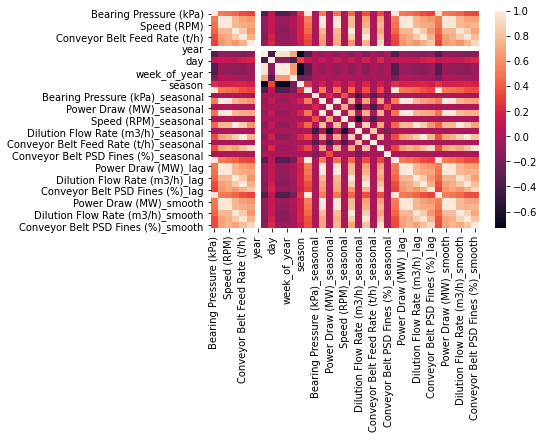

In [132]:
import seaborn as sns 

sns.heatmap(df.corr())

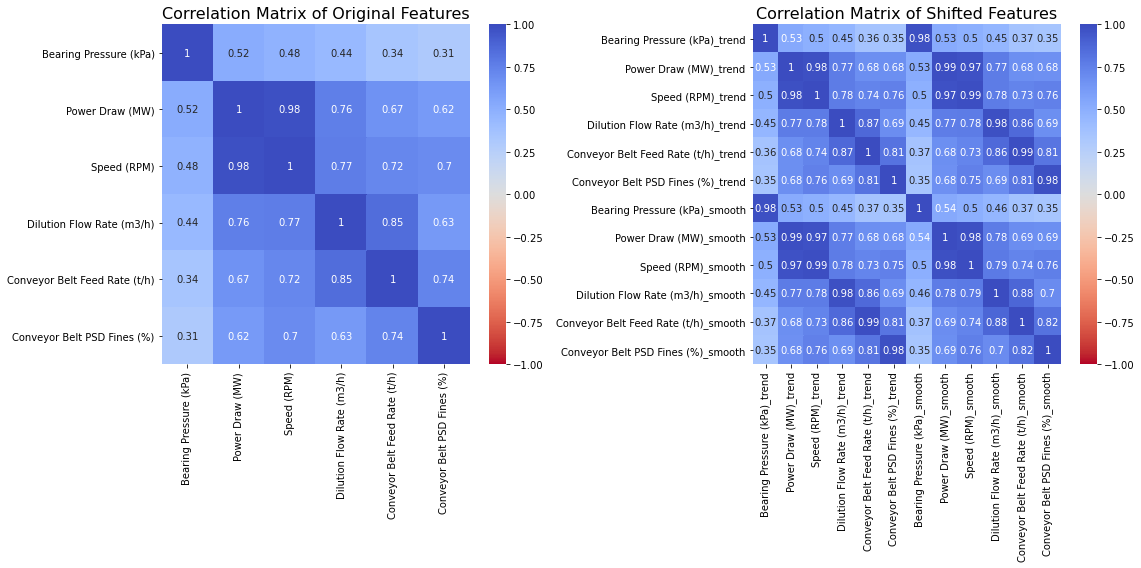

In [114]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

original_cols = ['Bearing Pressure (kPa)', 'Power Draw (MW)', 'Speed (RPM)',
       'Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)',
       'Conveyor Belt PSD Fines (%)']

corrmat = df[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Original Features', fontsize=16)

Added_cols = [
       'Bearing Pressure (kPa)_trend', 
       'Power Draw (MW)_trend', 
       'Speed (RPM)_trend', 
       'Dilution Flow Rate (m3/h)_trend', 
       'Conveyor Belt Feed Rate (t/h)_trend',
       'Conveyor Belt PSD Fines (%)_trend',
       'Bearing Pressure (kPa)_smooth',
       'Power Draw (MW)_smooth', 'Speed (RPM)_smooth',
       'Dilution Flow Rate (m3/h)_smooth',
       'Conveyor Belt Feed Rate (t/h)_smooth',
       'Conveyor Belt PSD Fines (%)_smooth']
corrmat = df[Added_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()

<AxesSubplot:>

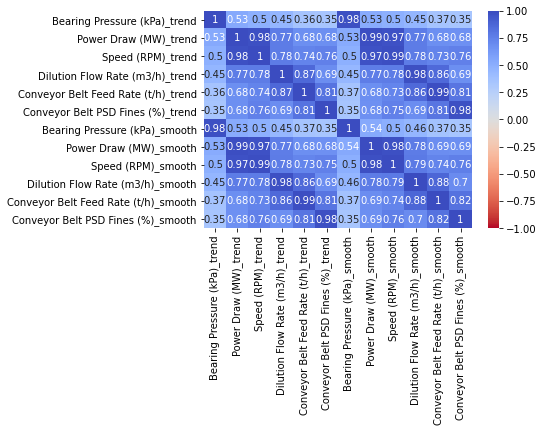

In [115]:
corrmat = df[Added_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')

In [ ]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
print(volunteer_subset.head(2))

#  Log transformation

In [123]:
df[original_cols].var()

Bearing Pressure (kPa)            40932.532379
Power Draw (MW)                       7.183930
Speed (RPM)                           2.615813
Dilution Flow Rate (m3/h)         64046.990048
Conveyor Belt Feed Rate (t/h)    445935.625427
Conveyor Belt PSD Fines (%)           0.000000
dtype: float64

In [124]:
df[original_cols].skew()

Bearing Pressure (kPa)          -14.589463
Power Draw (MW)                  -3.796528
Speed (RPM)                      -4.373514
Dilution Flow Rate (m3/h)        -1.682211
Conveyor Belt Feed Rate (t/h)    -2.022669
Conveyor Belt PSD Fines (%)            NaN
dtype: float64

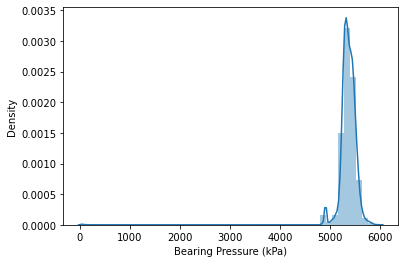

In [125]:
ax = sns.distplot(df["Bearing Pressure (kPa)"])

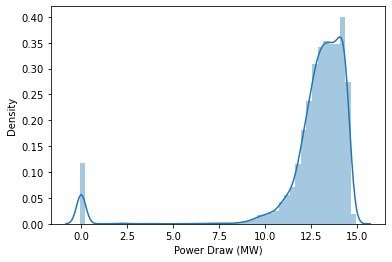

In [126]:
ax = sns.distplot(df["Power Draw (MW)"])

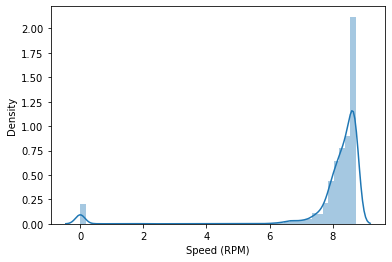

In [127]:
ax = sns.distplot(df["Speed (RPM)"])

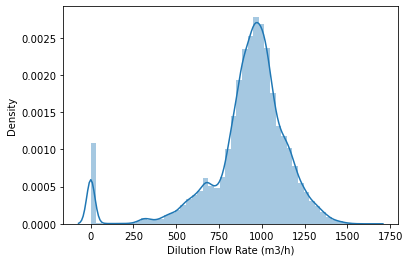

In [128]:
ax = sns.distplot(df["Dilution Flow Rate (m3/h)"])

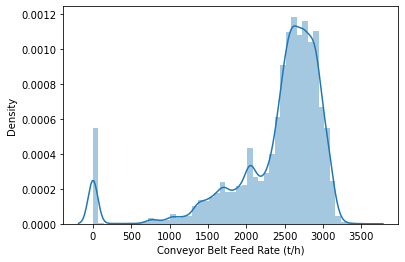

In [129]:
ax = sns.distplot(df["Conveyor Belt Feed Rate (t/h)"])

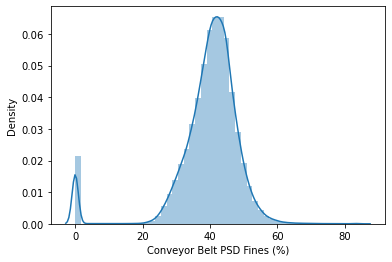

In [131]:
ax = sns.distplot(df["Conveyor Belt PSD Fines (%)"])

In [ ]:
# Print out the variance of the  column
print(df["Dilution Flow Rate (m3/h)"].var())

# Apply the log normalization function to  column
df['Dilution Flow Rate (m3/h)_log'] = np.log(df['Dilution Flow Rate (m3/h)'])

# Check the variance of the normalized column
print(df['Dilution Flow Rate (m3/h)_log'].var())

In [ ]:
ax = sns.distplot(df['Dilution Flow Rate (m3/h)_log])

# Centering and scaling
## Identifying features for standardization
### Normalization :MinMaxScaler


In [ ]:
""" Import MinMaxScaler from sklearn's preprocessing module.
    Instantiate the MinMaxScaler() as MM_scaler.
    Fit the MinMaxScaler on the Age column of so_numeric_df.
    Transform the same column with the scaler you just fit.
"""
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Create arrays for the features and the response variable
y_train_raw= TrainData[['Bearing Pressure (kPa)', 'Power Draw (MW)']].to_numpy()
X_train_raw = TrainData.to_numpy()

TrainData_Scaled = scaler.fit_transform(X_train_raw)
TestData_Scaled = scaler.transform(X_test_raw)